In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 水蒸気圧・飽和水蒸気圧を求めるモジュール

#### 水蒸気圧 $P_v(T,RH)$  
$Pv = RH * P_{vs} $

In [2]:
def Pv_ByRH( temp, miu ):
    Rv = 8316.96/18.016
    return rh * Pvs(temp)

#### 水蒸気圧 $P_v(T,\mu)$ 
 $\mu = R_v T log(RH)$  

⇔ $Pv = P_v * exp(\frac{\mu}{R_v T}) $

In [3]:
def Pv( temp, miu ):
    Rv = 8316.96/18.016
    rh = np.exp( miu / Rv / temp )
    return rh * Pvs(temp)

#### 飽和水蒸気圧 $P_{vs}$

In [4]:
def Pvs(temp):
    return np.exp( -5800.22060 / temp + 1.3914993 - 4.8640239E-2 * temp + 4.1764768E-5 * (temp ** 2.0) - 1.4452093E-8 * (temp ** 3.0) + 6.5459673 * np.log(temp) )

#### 水蒸気圧の温度微分 $\partial P_{v} / \partial T$

In [5]:
def DPvs(temp):
    DP = 10.795740 * 273.160 / temp / temp - 5.0280 / temp / np.log(10.0)\
    + ( 1.50475E-4 ) * 8.2969 / 273.16 * np.log(10.0)\
    * ( 10.0 ** ( -8.29690 * ( temp / 273.160 - 1.0 ) ) )\
    + ( 0.42873E-3 ) * 4.769550 * 273.160 / temp / temp * np.log(10.0)\
    * ( 10.0 ** ( 4.769550 * ( 1.0 - 273.160 / temp ) ) )
    return Pvs(temp) * DP * np.log(10.0)

#### 使用例

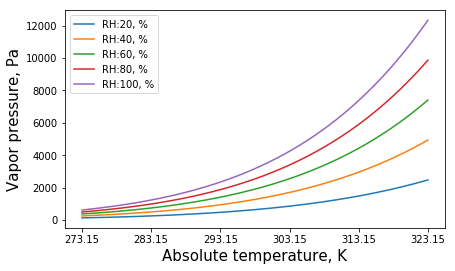

In [6]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)

xs = [ n * 0.01 for n in range(27315,32315) ]

for rh in [ 0.2, 0.4, 0.6, 0.8, 1.0 ]:
    ys = [ Pv_ByRH( x, rh ) for x in xs ]
    ax.plot( xs, ys, label = 'RH:' + str(int(rh*100)) + ', %' )

ax.set_xticks([ n * 10 + 273.15 for n in range(0, 6) ])
ax.set_yticks([ n * 2000 for n in range(0, 7) ])
ax.set_xlabel('Absolute temperature, K', fontsize = 15 )
ax.set_ylabel('Vapor pressure, Pa', fontsize = 15 )
plt.legend()
plt.show()